<a href="https://colab.research.google.com/github/ChamaraProgForDataAnal/Programming-for-Data-Analysis/blob/main/Programming_for_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Pandas library for data manipulation and management
import pandas as pd

# Defining a list of filenames containing air quality data
file_list = [
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv"
]

# Initializing an empty list to store the dataframes
dataframes = []

# Iterating through the list of filenames, reading each file into a DataFrame, and appending it to the list
for file in file_list:
    try:
        df = pd.read_csv(file)  # Reading the CSV file into a DataFrame
        dataframes.append(df)  # Adding the DataFrame to the list
    except FileNotFoundError:
        print(f"File {file} not found. Skipping...")
    except pd.errors.EmptyDataError:
        print(f"File {file} is empty. Skipping...")
    except Exception as e:
        print(f"An error occurred while processing {file}: {e}")


In [ ]:
# Checking if all DataFrames have the same columns
# We have 12 DataFrames, so we loop through and compare the columns of each DataFrame to the first one

# Assuming all DataFrames have been loaded into the `dataframes` list
reference_columns = set(dataframes[0].columns)  # Reference column set from the first DataFrame

# Iterate through the rest of the DataFrames and compare columns
for index, df in enumerate(dataframes[1:], start=1):  # Start indexing at 1 for clarity
    if set(df.columns) != reference_columns:
        print(f"DataFrame at index {index} has different columns.")
    else:
        print(f"DataFrame at index {index} has matching columns.")


DataFrame at index 1 has matching columns.
DataFrame at index 2 has matching columns.
DataFrame at index 3 has matching columns.
DataFrame at index 4 has matching columns.
DataFrame at index 5 has matching columns.
DataFrame at index 6 has matching columns.
DataFrame at index 7 has matching columns.
DataFrame at index 8 has matching columns.
DataFrame at index 9 has matching columns.
DataFrame at index 10 has matching columns.
DataFrame at index 11 has matching columns.


In [ ]:
# Combining all DataFrames into a single DataFrame
# Since there is no difference in columns, we can safely concatenate the DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)  # Combine and reset the index

# Displaying the combined DataFrame (Optional: for verification purposes)
print(combined_df)


           No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3   
0           1  2013      3    1     0    4.0   4.0  14.0  20.0   300.0  69.0  \
1           2  2013      3    1     1    4.0   4.0  13.0  17.0   300.0  72.0   
2           3  2013      3    1     2    3.0   3.0  10.0  19.0   300.0  69.0   
3           4  2013      3    1     3    3.0   6.0   7.0  24.0   400.0  62.0   
4           5  2013      3    1     4    3.0   6.0   5.0  14.0   400.0  71.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
420763  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
420764  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
420765  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
420766  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
420767  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

        TEMP    PRES  DEWP  RAIN   wd  

In [ ]:
# Checking the shape of each DataFrame to ensure no files were missed during loading
print("Shapes of individual DataFrames:")
for index, df in enumerate(dataframes):
    print(f"DataFrame {index + 1}: {df.shape}")

# Optionally, check the shape of the combined DataFrame
print("\nShape of the combined DataFrame:")
print(combined_df.shape)


Shapes of individual DataFrames:
DataFrame 1: (35064, 18)
DataFrame 2: (35064, 18)
DataFrame 3: (35064, 18)
DataFrame 4: (35064, 18)
DataFrame 5: (35064, 18)
DataFrame 6: (35064, 18)
DataFrame 7: (35064, 18)
DataFrame 8: (35064, 18)
DataFrame 9: (35064, 18)
DataFrame 10: (35064, 18)
DataFrame 11: (35064, 18)
DataFrame 12: (35064, 18)

Shape of the combined DataFrame:
(420768, 18)


In [ ]:
# Displaying information about the combined DataFrame to understand its structure and data types
print("Combined DataFrame Info:")
print(combined_df.info())  # Summary of columns, non-null counts, and data types

# Checking for missing values in each column
print("\nMissing Values in Combined DataFrame:")
print(combined_df.isnull().sum())  # Number of missing values per column


Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None

Missing Values

In [ ]:
# Displaying the column names of the combined DataFrame
print("Columns in the Combined DataFrame:")
print(combined_df.columns)


Columns in the Combined DataFrame:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [ ]:
# Creating a new DataFrame for imputed data by copying the original combined DataFrame
imputed_df = combined_df.copy()

# Deleting the original combined DataFrame to free up memory (optional, based on resource constraints)
del combined_df

# List of columns with potential null values
columns_with_nulls = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Imputing missing values using the same month's average for the same station and year
for column in columns_with_nulls:
    if imputed_df[column].isnull().sum() > 0:  # Check if the column contains null values
        imputed_df[column] = imputed_df.groupby(['year', 'month', 'station'])[column].transform(lambda x: x.fillna(x.mean()))

# Optional: Display a summary of remaining null values to verify the imputation
print("Remaining Missing Values After Imputation:")
print(imputed_df.isnull().sum())


Remaining Missing Values After Imputation:
No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO         1488
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64


In [ ]:
# Checking for remaining null values in the imputed DataFrame
print("Remaining Null Values in the Imputed DataFrame:")
null_values = imputed_df.isnull().sum()

# Display columns with remaining null values, if any
if null_values.any():
    print(null_values[null_values > 0])  # Show only columns with remaining null values
else:
    print("No null values remaining in the DataFrame!")


Remaining Null Values in the Imputed DataFrame:
CO    1488
wd    1822
dtype: int64


In [ ]:
# Imputing remaining missing values in the 'CO' column using the yearly average
if imputed_df['CO'].isnull().sum() > 0:
    imputed_df['CO'] = imputed_df.groupby(['year'])['CO'].transform(lambda x: x.fillna(x.mean()))

# Checking if the null values in 'CO' have been successfully imputed
print("Remaining Null Values in 'CO':", imputed_df['CO'].isnull().sum())


Remaining Null Values in 'CO': 0


In [ ]:
# Checking for remaining null values in the DataFrame after imputing 'CO'
print("Final Check for Null Values in the Imputed DataFrame:")
remaining_nulls = imputed_df.isnull().sum()

# Display columns with remaining null values, if any
if remaining_nulls.any():
    print("Columns with remaining null values:")
    print(remaining_nulls[remaining_nulls > 0])
else:
    print("All missing values have been successfully imputed!")


Final Check for Null Values in the Imputed DataFrame:
Columns with remaining null values:
wd    1822
dtype: int64


In [ ]:
# Imputing missing values in the 'wd' column using the most frequent value (mode) for the same month, year, and station
if imputed_df['wd'].isnull().sum() > 0:
    imputed_df['wd'] = imputed_df.groupby(['year', 'month', 'station'])['wd'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
    )

# Checking for remaining null values in the DataFrame
print("Final Check for Null Values After Imputing 'wd':")
remaining_nulls = imputed_df.isnull().sum()

# Display columns with remaining null values, if any
if remaining_nulls.any():
    print("Columns with remaining null values:")
    print(remaining_nulls[remaining_nulls > 0])
else:
    print("All missing values have been successfully imputed!")


Final Check for Null Values After Imputing 'wd':
All missing values have been successfully imputed!


In [ ]:
# Displaying the statistical summary of the numeric columns in the DataFrame
print("Statistical Summary of the DataFrame:")
print(imputed_df.describe())


Statistical Summary of the DataFrame:
                  No           year          month            day   
count  420768.000000  420768.000000  420768.000000  420768.000000  \
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2   
count  420768.000000  420768.000000  420768.000000  420768.000000  \
mean       11.500000      79.739706     104.592681      15.843541   
std         6.922195      80.077954      91.151745      21.529973   
min         0.000000       2.000000       2.000000       0.28560

In [ ]:
# Deleting the 'No' column as it is a simple index and not required for further analysis
if 'No' in imputed_df.columns:
    del imputed_df['No']
    print("'No' column has been successfully removed.")

# Displaying the first few rows of the updated DataFrame
print("Updated DataFrame after removing 'No' column:")
print(imputed_df.head())


'No' column has been successfully removed.
Updated DataFrame after removing 'No' column:
   year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES   
0  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7  1023.0  \
1  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1  1023.2   
2  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1  1023.5   
3  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4  1024.5   
4  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM   station  
0 -18.8   0.0  NNW   4.4  Guanyuan  
1 -18.2   0.0    N   4.7  Guanyuan  
2 -18.2   0.0  NNW   5.6  Guanyuan  
3 -19.4   0.0   NW   3.1  Guanyuan  
4 -19.5   0.0    N   2.0  Guanyuan  


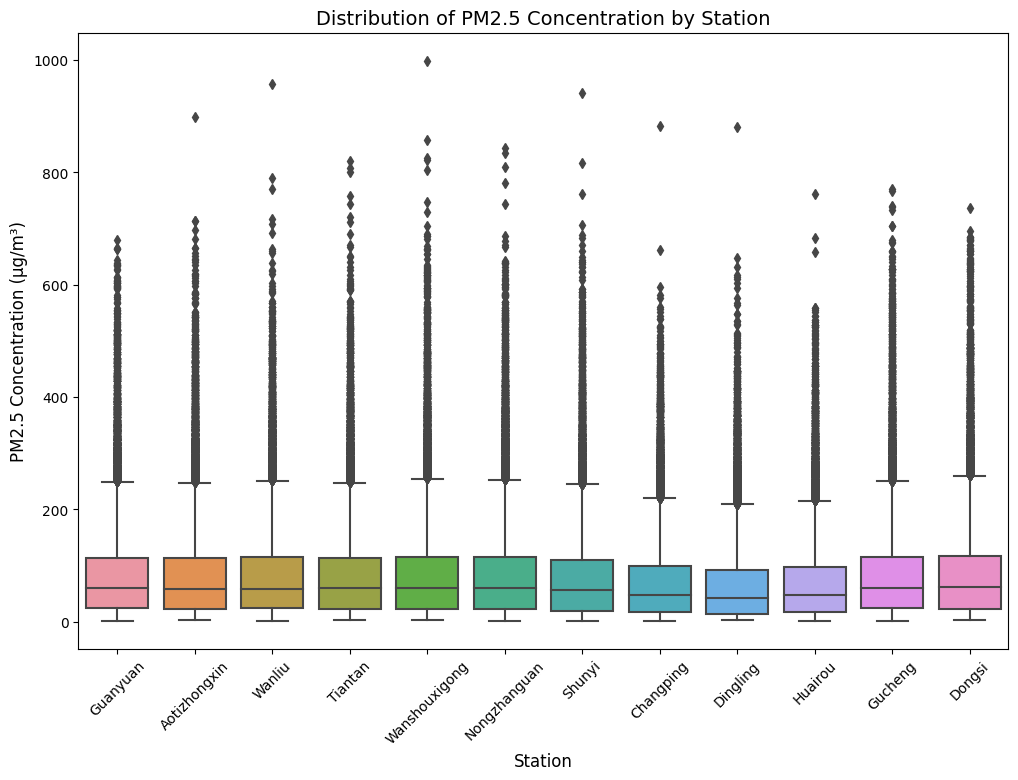

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(12, 8))  # Adjusting figure size for better readability

# Creating a boxplot to analyze the PM2.5 distribution by station
sns.boxplot(x="station", y="PM2.5", data=imputed_df)

# Adding labels and title
plt.xlabel("Station", fontsize=12)
plt.ylabel("PM2.5 Concentration (µg/m³)", fontsize=12)
plt.title("Distribution of PM2.5 Concentration by Station", fontsize=14)

# Rotating x-axis labels for better visibility if there are many stations
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


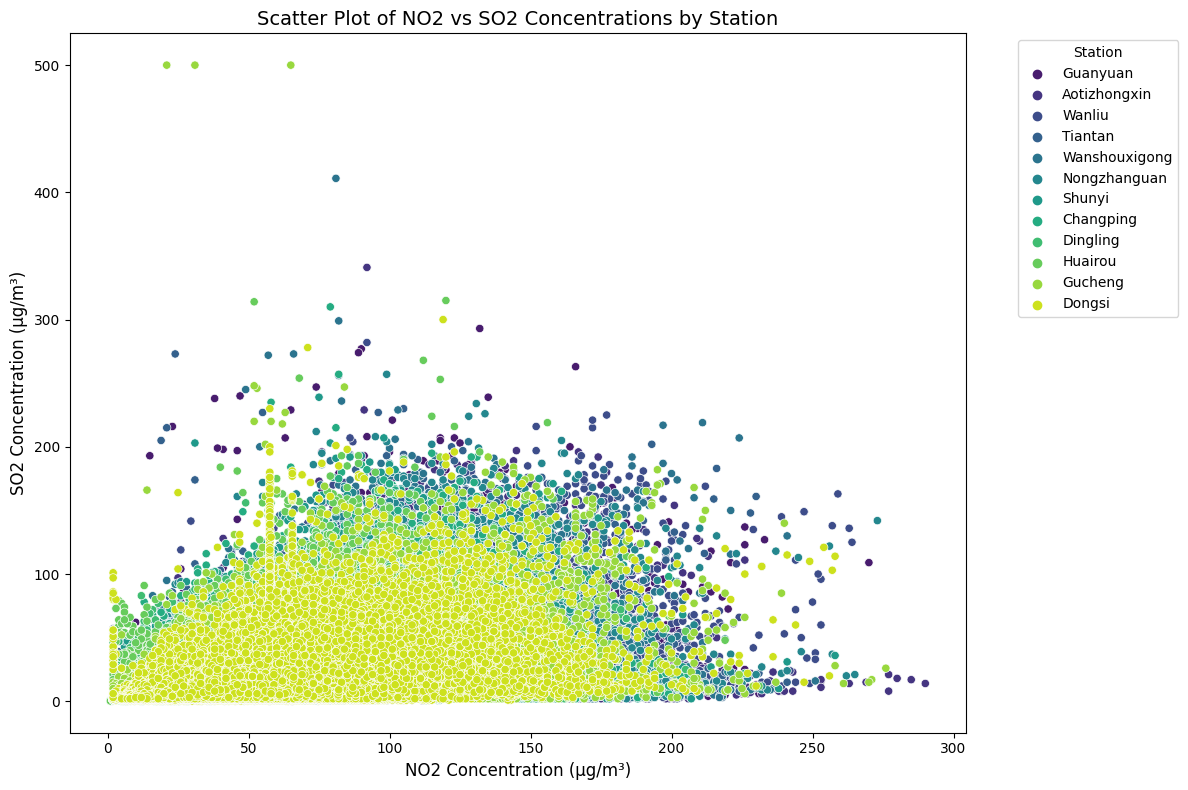

In [ ]:
# Setting up the scatter plot to analyze SO2 and NO2 concentrations for various stations
plt.figure(figsize=(12, 8))

# Creating the scatter plot with hue to distinguish between stations
sns.scatterplot(x="NO2", y="SO2", hue="station", data=imputed_df, palette="viridis")

# Adding labels and title
plt.xlabel("NO2 Concentration (µg/m³)", fontsize=12)
plt.ylabel("SO2 Concentration (µg/m³)", fontsize=12)
plt.title("Scatter Plot of NO2 vs SO2 Concentrations by Station", fontsize=14)

# Adjusting the legend and improving layout
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Displaying the plot
plt.show()


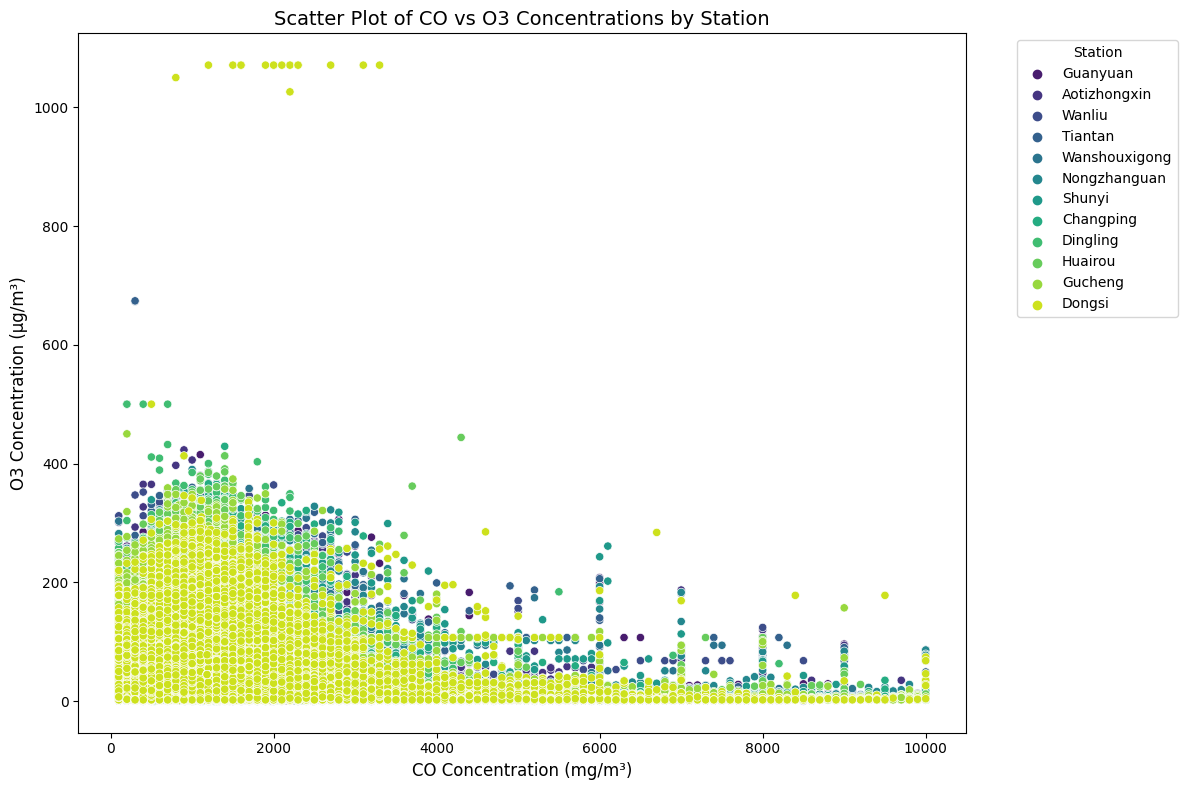

In [ ]:
# Setting up the scatter plot to analyze CO and O3 concentrations for various stations
plt.figure(figsize=(12, 8))

# Creating the scatter plot with hue to distinguish between stations
sns.scatterplot(x="CO", y="O3", hue="station", data=imputed_df, palette="viridis")

# Adding labels and title
plt.xlabel("CO Concentration (mg/m³)", fontsize=12)
plt.ylabel("O3 Concentration (µg/m³)", fontsize=12)
plt.title("Scatter Plot of CO vs O3 Concentrations by Station", fontsize=14)

# Adjusting the legend and improving layout
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Displaying the plot
plt.show()


In [ ]:
# Function to calculate AQI for SO2 based on China's air quality standards
def calculate_so2_aqi(x):
    if x <= 150:
        aqi = (0.33 * (x - 0) + 0)
    elif x <= 500:
        aqi = ((50 / 350) * (x - 150) + 50)
    elif x <= 650:
        aqi = ((50 / 150) * (x - 500) + 100)
    elif x <= 800:
        aqi = ((50 / 150) * (x - 650) + 150)
    elif x <= 1600:
        aqi = ((100 / 800) * (x - 800) + 200)
    elif x <= 2100:
        aqi = ((100 / 500) * (x - 1600) + 300)
    else:
        aqi = ((100 / 520) * (x - 2100) + 400)
    return aqi

# Applying the AQI calculation to the 'SO2' column
imputed_df['AQI'] = imputed_df['SO2'].apply(calculate_so2_aqi)

# Verifying the AQI column
print("Sample AQI values based on SO2:")
print(imputed_df[['SO2', 'AQI']].head())


Sample AQI values based on SO2:
    SO2   AQI
0  14.0  4.62
1  13.0  4.29
2  10.0  3.30
3   7.0  2.31
4   5.0  1.65


In [ ]:
# Function to calculate AQI for NO2 based on China's air quality standards
def calculate_no2_aqi(x):
    if x <= 100:
        aqi = ((50 / 100) * (x - 0) + 0)
    elif x <= 200:
        aqi = ((50 / 100) * (x - 100) + 50)
    elif x <= 700:
        aqi = ((50 / 500) * (x - 200) + 100)
    elif x <= 1200:
        aqi = ((50 / 500) * (x - 700) + 150)
    elif x <= 2340:
        aqi = ((100 / 1140) * (x - 1200) + 200)
    elif x <= 3090:
        aqi = ((100 / 750) * (x - 2340) + 300)
    else:
        aqi = ((100 / 750) * (x - 3090) + 400)
    return aqi

# Applying the AQI calculation for NO2
imputed_df['NO2_AQI'] = imputed_df['NO2'].apply(calculate_no2_aqi)

# Verifying the NO2 AQI values
print("Sample AQI values based on NO2:")
print(imputed_df[['NO2', 'NO2_AQI']].head())


Sample AQI values based on NO2:
    NO2  NO2_AQI
0  20.0     10.0
1  17.0      8.5
2  19.0      9.5
3  24.0     12.0
4  14.0      7.0


In [ ]:
# Function to calculate AQI for CO based on China's air quality standards
def calculate_co_aqi(x):
    if x <= 5000:
        aqi = ((50 / 5000) * (x - 0) + 0)
    elif x <= 10000:
        aqi = ((50 / 5000) * (x - 5000) + 50)
    elif x <= 35000:
        aqi = ((50 / 25000) * (x - 10000) + 100)
    elif x <= 60000:
        aqi = ((50 / 25000) * (x - 35000) + 150)
    elif x <= 90000:
        aqi = ((100 / 30000) * (x - 60000) + 200)
    elif x <= 120000:
        aqi = ((100 / 30000) * (x - 90000) + 300)
    else:
        aqi = ((100 / 30000) * (x - 120000) + 400)
    return aqi

# Applying the AQI calculation for CO
imputed_df['CO_AQI'] = imputed_df['CO'].apply(calculate_co_aqi)

# Verifying the CO AQI values
print("Sample AQI values based on CO:")
print(imputed_df[['CO', 'CO_AQI']].head())


Sample AQI values based on CO:
      CO  CO_AQI
0  300.0     3.0
1  300.0     3.0
2  300.0     3.0
3  400.0     4.0
4  400.0     4.0


In [ ]:
# Function to calculate AQI for O3 based on China's air quality standards
def calculate_o3_aqi(x):
    if x <= 160:
        aqi = ((50 / 160) * (x - 0) + 0)
    elif x <= 200:
        aqi = ((50 / 40) * (x - 160) + 50)
    elif x <= 300:
        aqi = ((50 / 100) * (x - 200) + 100)
    elif x <= 400:
        aqi = ((50 / 100) * (x - 300) + 150)
    elif x <= 800:
        aqi = ((100 / 400) * (x - 400) + 200)
    elif x <= 1000:
        aqi = ((100 / 200) * (x - 800) + 300)
    else:
        aqi = ((100 / 200) * (x - 1000) + 400)
    return aqi

# Applying the AQI calculation for O3
imputed_df['O3_AQI'] = imputed_df['O3'].apply(calculate_o3_aqi)

# Verifying the O3 AQI values
print("Sample AQI values based on O3:")
print(imputed_df[['O3', 'O3_AQI']].head())


Sample AQI values based on O3:
     O3   O3_AQI
0  69.0  21.5625
1  72.0  22.5000
2  69.0  21.5625
3  62.0  19.3750
4  71.0  22.1875


In [ ]:
# Calculate 24-hour mean for PM2.5 by grouping data by day, station, month, and year
imputed_df['PM2.5_24hm'] = imputed_df.groupby(['day', 'station', 'month', 'year'])['PM2.5'].transform('mean')

# Function to calculate AQI for PM2.5 based on China's air quality standards
def calculate_pm25_aqi(x):
    if x <= 35:
        aqi = ((50 / 35) * (x - 0) + 0)
    elif x <= 75:
        aqi = ((50 / 40) * (x - 35) + 50)
    elif x <= 115:
        aqi = ((50 / 40) * (x - 75) + 100)
    elif x <= 150:
        aqi = ((50 / 35) * (x - 115) + 150)
    elif x <= 250:
        aqi = ((100 / 100) * (x - 150) + 200)
    elif x <= 350:
        aqi = ((100 / 100) * (x - 250) + 300)
    else:
        aqi = ((100 / 150) * (x - 350) + 400)
    return aqi

# Applying the AQI calculation for PM2.5 24-hour mean
imputed_df['PM2.5_AQI'] = imputed_df['PM2.5_24hm'].apply(calculate_pm25_aqi)

# Verifying the calculated AQI values
print("Sample AQI values based on PM2.5:")
print(imputed_df[['PM2.5_24hm', 'PM2.5_AQI']].head())


Sample AQI values based on PM2.5:
   PM2.5_24hm  PM2.5_AQI
0    7.541667   10.77381
1    7.541667   10.77381
2    7.541667   10.77381
3    7.541667   10.77381
4    7.541667   10.77381


In [ ]:
# Calculate 24-hour mean for PM2.5 by grouping data by day, station, month, and year
imputed_df['PM2.5_24hm'] = imputed_df.groupby(['day', 'station', 'month', 'year'])['PM2.5'].transform('mean')

# Function to calculate AQI for PM2.5 based on China's air quality standards
def calculate_pm25_aqi(x):
    if x <= 35:
        aqi = ((50 / 35) * (x - 0) + 0)
    elif x <= 75:
        aqi = ((50 / 40) * (x - 35) + 50)
    elif x <= 115:
        aqi = ((50 / 40) * (x - 75) + 100)
    elif x <= 150:
        aqi = ((50 / 35) * (x - 115) + 150)
    elif x <= 250:
        aqi = ((100 / 100) * (x - 150) + 200)
    elif x <= 350:
        aqi = ((100 / 100) * (x - 250) + 300)
    else:
        aqi = ((100 / 150) * (x - 350) + 400)
    return aqi

# Applying the AQI calculation for PM2.5 24-hour mean
imputed_df['PM2.5_AQI'] = imputed_df['PM2.5_24hm'].apply(calculate_pm25_aqi)

# Verifying the calculated AQI values
print("Sample AQI values based on PM2.5:")
print(imputed_df[['PM2.5_24hm', 'PM2.5_AQI']].head())


Sample AQI values based on PM2.5:
   PM2.5_24hm  PM2.5_AQI
0    7.541667   10.77381
1    7.541667   10.77381
2    7.541667   10.77381
3    7.541667   10.77381
4    7.541667   10.77381


In [ ]:
# Calculate 24-hour mean for PM10 by grouping data by day, station, month, and year
imputed_df['PM10_24hm'] = imputed_df.groupby(['day', 'station', 'month', 'year'])['PM10'].transform('mean')

# Function to calculate AQI for PM10 based on China's air quality standards
def calculate_pm10_aqi(x):
    if x <= 50:
        aqi = ((50 / 50) * (x - 0) + 0)
    elif x <= 150:
        aqi = ((50 / 100) * (x - 50) + 50)
    elif x <= 250:
        aqi = ((50 / 100) * (x - 150) + 100)
    elif x <= 350:
        aqi = ((50 / 100) * (x - 250) + 150)
    elif x <= 420:
        aqi = ((100 / 70) * (x - 350) + 200)
    elif x <= 500:
        aqi = ((100 / 80) * (x - 420) + 300)
    else:
        aqi = ((100 / 100) * (x - 500) + 400)
    return aqi

# Applying the AQI calculation for PM10 24-hour mean
imputed_df['PM10_AQI'] = imputed_df['PM10_24hm'].apply(calculate_pm10_aqi)

# Verifying the calculated AQI values
print("Sample AQI values based on PM10:")
print(imputed_df[['PM10_24hm', 'PM10_AQI']].head())


Sample AQI values based on PM10:
   PM10_24hm   PM10_AQI
0  11.666667  11.666667
1  11.666667  11.666667
2  11.666667  11.666667
3  11.666667  11.666667
4  11.666667  11.666667


In [ ]:
# Dropping unnecessary intermediate columns for PM2.5 and PM10 24-hour mean
imputed_df.drop(['PM2.5_24hm', 'PM10_24hm'], axis=1, inplace=True)

# Checking the distribution of AQI values
aqi_counts = imputed_df['AQI'].value_counts()
print("Distribution of AQI values:")
print(aqi_counts)


Distribution of AQI values:
AQI
0.660000     98557
0.990000     32784
1.320000     21716
1.650000     17964
1.980000     16567
             ...  
2.830991         1
7.019717         1
28.745640        1
58.857143        1
1.683000         1
Name: count, Length: 1202, dtype: int64


Distribution of AQI Status:
AQI_Status
Good            420120
Satisfactory       648
Name: count, dtype: int64


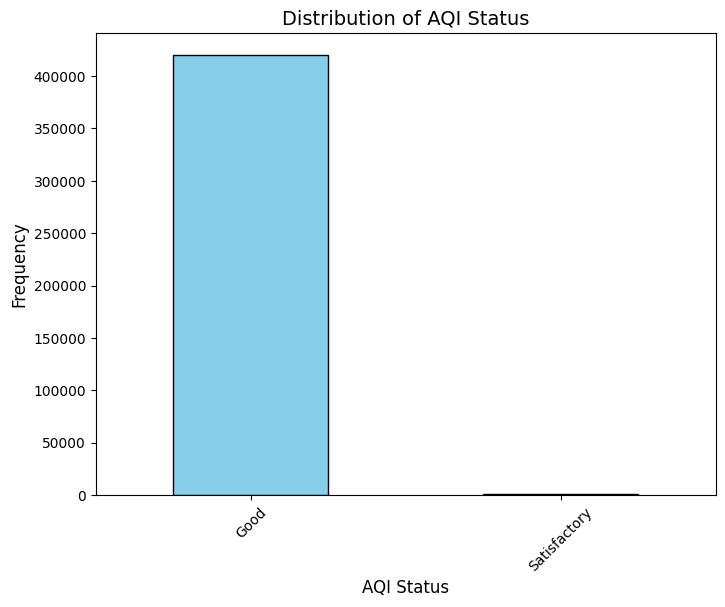

In [ ]:
# Function to assign AQI status based on AQI levels
def impute_AQI_status(aqi):
    if aqi < 51:
        return 'Good'
    elif aqi < 101:
        return 'Satisfactory'
    elif aqi < 201:
        return 'Moderate'
    elif aqi < 301:
        return 'Poor'
    elif aqi < 401:
        return 'Very Poor'
    else:
        return 'Severe'

# Applying the function to create a new column for AQI Status
imputed_df['AQI_Status'] = imputed_df['AQI'].apply(impute_AQI_status)

# Checking the distribution of AQI statuses
aqi_status_counts = imputed_df['AQI_Status'].value_counts()
print("Distribution of AQI Status:")
print(aqi_status_counts)

# Optional: Visualizing the AQI status distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
aqi_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('AQI Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of AQI Status', fontsize=14)
plt.xticks(rotation=45)
plt.show()


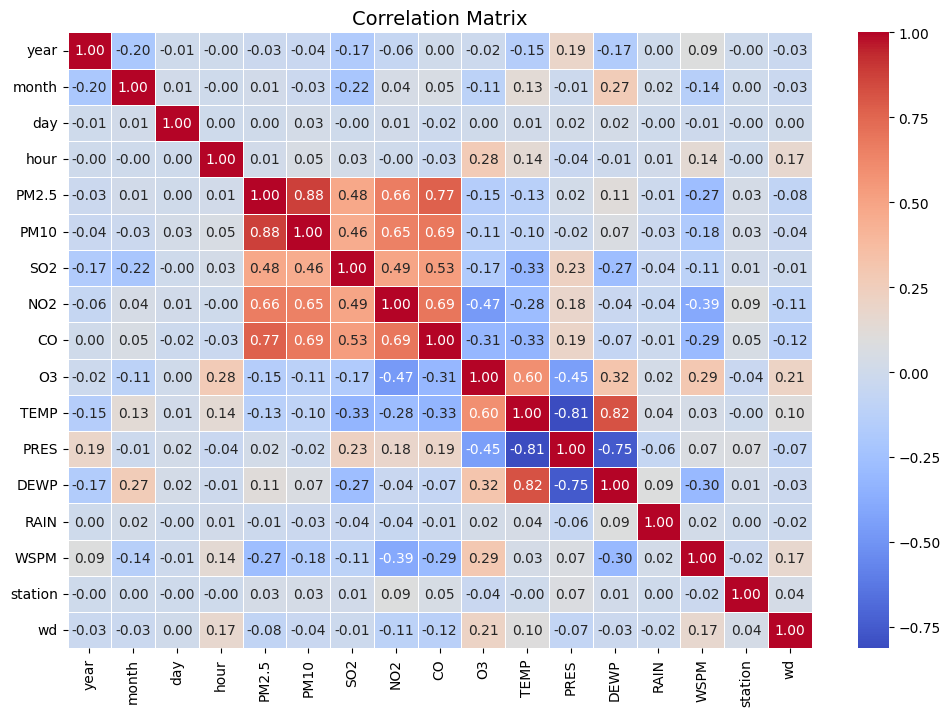

In [ ]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encoding categorical data to numeric labels
le = LabelEncoder()
imputed_df['wd'] = le.fit_transform(imputed_df['wd'])  # Encoding 'wd' column
imputed_df['station'] = le.fit_transform(imputed_df['station'])  # Encoding 'station' column

# Selecting numeric columns for correlation analysis
corr_df = imputed_df[['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
                      'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station', 'wd']]

# Creating a correlation matrix
corr_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()


In [ ]:
# Dropping 'PM2.5' and 'PRES' columns to address multicollinearity
model_df = imputed_df.drop(['PM2.5', 'PRES'], axis=1)

# Deleting the original DataFrame to free up memory
del imputed_df

# Displaying the first few rows of the updated DataFrame
print("Preview of the Model DataFrame:")
print(model_df.head())


Preview of the Model DataFrame:
   year  month  day  hour  PM10   SO2   NO2     CO    O3  TEMP  ...  wd  WSPM   
0  2013      3    1     0   4.0  14.0  20.0  300.0  69.0  -0.7  ...   6   4.4  \
1  2013      3    1     1   4.0  13.0  17.0  300.0  72.0  -1.1  ...   3   4.7   
2  2013      3    1     2   3.0  10.0  19.0  300.0  69.0  -1.1  ...   6   5.6   
3  2013      3    1     3   6.0   7.0  24.0  400.0  62.0  -1.4  ...   7   3.1   
4  2013      3    1     4   6.0   5.0  14.0  400.0  71.0  -2.0  ...   3   2.0   

   station   AQI  NO2_AQI  CO_AQI   O3_AQI  PM2.5_AQI   PM10_AQI  AQI_Status  
0        4  4.62     10.0     3.0  21.5625   10.77381  11.666667        Good  
1        4  4.29      8.5     3.0  22.5000   10.77381  11.666667        Good  
2        4  3.30      9.5     3.0  21.5625   10.77381  11.666667        Good  
3        4  2.31     12.0     4.0  19.3750   10.77381  11.666667        Good  
4        4  1.65      7.0     4.0  22.1875   10.77381  11.666667        Good  

[5 row

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Selecting features for PCA by excluding categorical and target variables
features_for_pca = model_df.drop(['station', 'wd', 'AQI', 'AQI_Status'], axis=1)

# Applying PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_values = pca.fit_transform(features_for_pca)

# Creating a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data=pca_values, columns=['PC1', 'PC2'])

# Calculating the total explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Total Explained Variance Ratio by 2 Principal Components: {explained_variance_ratio:.2f}")


Total Explained Variance Ratio by 2 Principal Components: 0.99


In [ ]:
# Resetting indices for both DataFrames to ensure proper alignment
model_df = model_df.reset_index(drop=True)
pca_df = pca_df.reset_index(drop=True)

# Combining selected columns from the original DataFrame with PCA-transformed components
model_df = pd.concat([model_df[['station', 'wd', 'AQI', 'AQI_Status']], pca_df], axis=1)

# Encoding the 'station' column to numerical labels
model_df['station'] = le.fit_transform(model_df['station'])

# Displaying the first few rows of the combined DataFrame
print("Preview of the Combined DataFrame for Modeling:")
print(model_df.head())


Preview of the Combined DataFrame for Modeling:
   station  wd   AQI AQI_Status         PC1        PC2
0        4   6  4.62       Good -945.009447 -79.577980
1        4   3  4.29       Good -945.149160 -79.331030
2        4   6  3.30       Good -945.130937 -80.490682
3        4   7  2.31       Good -845.079213 -86.807336
4        4   3  1.65       Good -845.514164 -86.204691


In [ ]:
# Deleting the PCA-transformed DataFrame to free up memory
del pca_df

# Importing necessary libraries for train-test split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting features and target labels
X = model_df.drop(columns=['AQI', 'AQI_Status'])  # Features
y = model_df['AQI_Status']  # Target

# Splitting the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features using StandardScaler for normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data using the same scaler

# Confirming the shapes of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (336614, 4), X_test shape: (84154, 4)
y_train shape: (336614,), y_test shape: (84154,)


In [ ]:
# Displaying the columns in model_df
print("Columns in model_df:")
print(model_df.columns)


Columns in model_df:
Index(['station', 'wd', 'AQI', 'AQI_Status', 'PC1', 'PC2'], dtype='object')


In [ ]:
#Importing modules for model application and evaluation
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Splitting the features (X) and target (y)
X = model_df.drop('AQI_Status', axis=1)
y = model_df['AQI_Status']

# Handling categorical data with one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Setting up K-Fold cross-validation with 3 splits
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initializing the k-NN classifier
knn = KNeighborsClassifier()

# Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    verbose=1
)

# Fitting the model to the scaled data
grid_search.fit(X_scaled, y)

# Extracting the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Displaying the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9995032892235151


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

# Cross-validation on the entire dataset
cv_results = cross_val_score(best_knn, X_scaled, y, cv=kf, scoring='accuracy')

# Average accuracy from cross-validation
print(f"Average CV Accuracy: {np.mean(cv_results):.2f}")

# Train-test split for detailed evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fitting the best model on the training data
best_knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = best_knn.predict(X_test)

# Generating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generating the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Average CV Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     84023
Satisfactory       0.86      0.88      0.87       131

    accuracy                           1.00     84154
   macro avg       0.93      0.94      0.93     84154
weighted avg       1.00      1.00      1.00     84154


Confusion Matrix:
[[84004    19]
 [   16   115]]


GaussianNB Average CV Accuracy: 0.99

GaussianNB Test Set Accuracy: 0.99

GaussianNB Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.99      1.00     84023
Satisfactory       0.19      1.00      0.32       131

    accuracy                           0.99     84154
   macro avg       0.60      1.00      0.66     84154
weighted avg       1.00      0.99      1.00     84154


GaussianNB Confusion Matrix:
[[83475   548]
 [    0   131]]


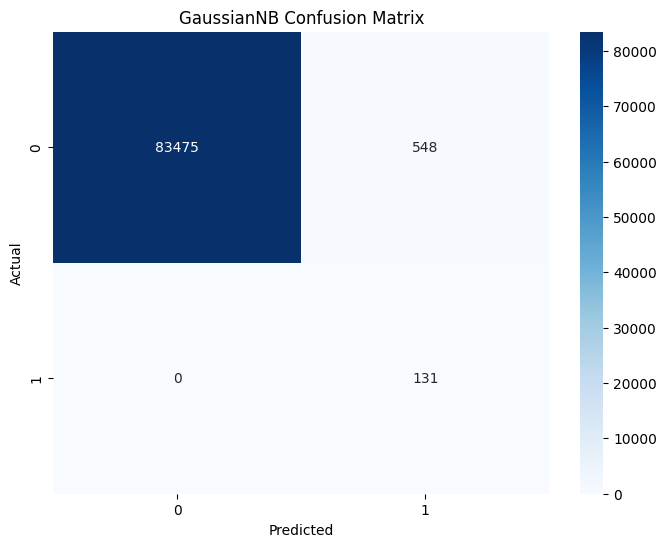

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform cross-validation
gnb_cv_results = cross_val_score(gnb, X_scaled, y, cv=kf, scoring='accuracy')
print(f"GaussianNB Average CV Accuracy: {np.mean(gnb_cv_results):.2f}")

# Fit the Gaussian Naive Bayes model to the training data
gnb.fit(X_train, y_train)

# Predict the test set results
gnb_y_pred = gnb.predict(X_test)

# Evaluate the model on the test set
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print(f"\nGaussianNB Test Set Accuracy: {gnb_accuracy:.2f}")

# Classification report
print("\nGaussianNB Classification Report:")
print(classification_report(y_test, gnb_y_pred))

# Confusion matrix
print("\nGaussianNB Confusion Matrix:")
print(confusion_matrix(y_test, gnb_y_pred))

# Optional: Visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gnb_y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GaussianNB Confusion Matrix")
plt.show()


Logistic Regression Average CV Accuracy: 1.00

Logistic Regression Test Set Accuracy: 1.00

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     84023
Satisfactory       0.95      1.00      0.97       131

    accuracy                           1.00     84154
   macro avg       0.97      1.00      0.99     84154
weighted avg       1.00      1.00      1.00     84154


Logistic Regression Confusion Matrix:
[[84016     7]
 [    0   131]]


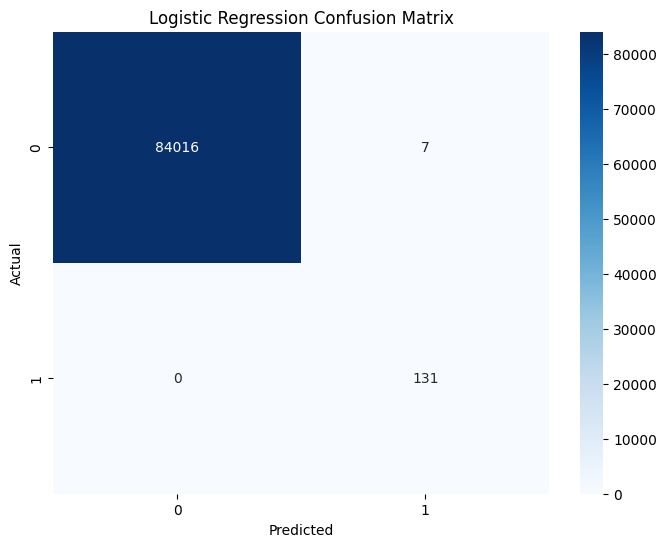

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Cross-validation for Logistic Regression
lr_cv_results = cross_val_score(lr, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Logistic Regression Average CV Accuracy: {np.mean(lr_cv_results):.2f}")

# Fit the Logistic Regression model on the training data
lr.fit(X_train, y_train)

# Predict the test set results
lr_y_pred = lr.predict(X_test)

# Evaluate the model's accuracy on the test set
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"\nLogistic Regression Test Set Accuracy: {lr_accuracy:.2f}")

# Detailed classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

# Confusion matrix
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

# Optional: Confusion matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


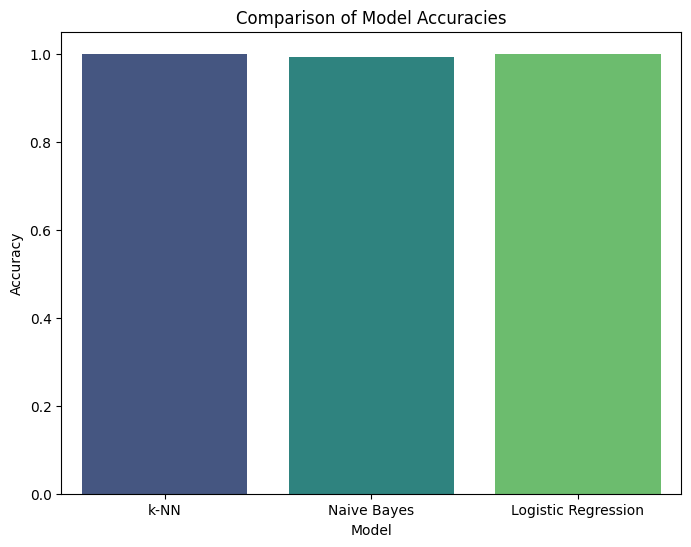

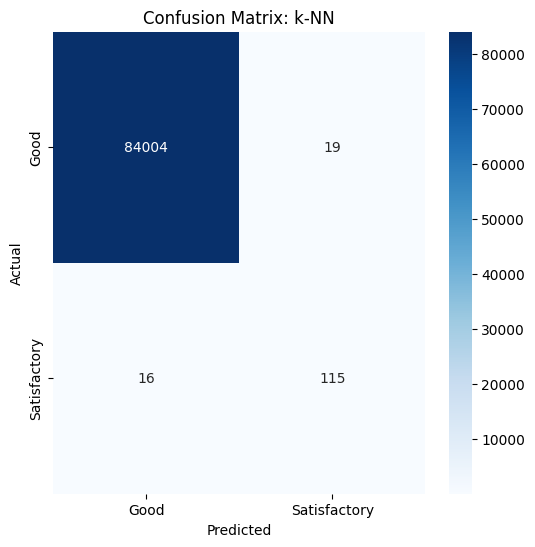

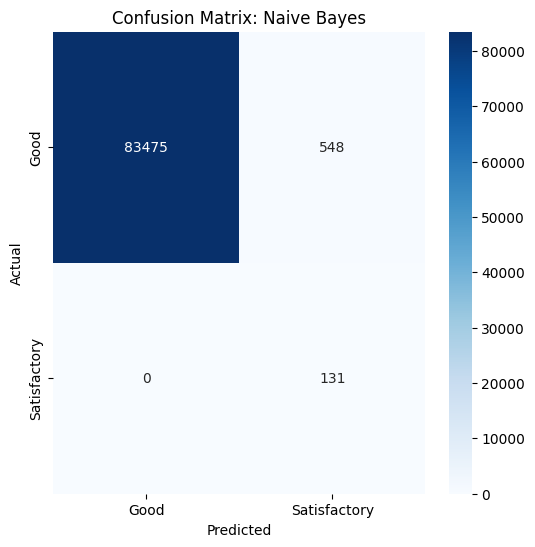

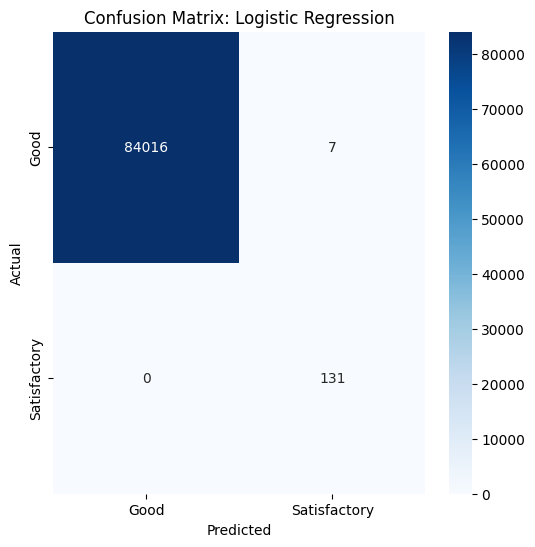


Classification Report for k-NN:
              precision    recall  f1-score       support
Good           0.999810  0.999774  0.999792  84023.000000
Satisfactory   0.858209  0.877863  0.867925    131.000000
accuracy       0.999584  0.999584  0.999584      0.999584
macro avg      0.929009  0.938818  0.933858  84154.000000
weighted avg   0.999589  0.999584  0.999586  84154.000000

Classification Report for Naive Bayes:
              precision    recall  f1-score       support
Good           1.000000  0.993478  0.996728  84023.000000
Satisfactory   0.192931  1.000000  0.323457    131.000000
accuracy       0.993488  0.993488  0.993488      0.993488
macro avg      0.596465  0.996739  0.660093  84154.000000
weighted avg   0.998744  0.993488  0.995680  84154.000000

Classification Report for Logistic Regression:
              precision    recall  f1-score       support
Good           1.000000  0.999917  0.999958  84023.000000
Satisfactory   0.949275  1.000000  0.973978    131.000000
accuracy 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a dictionary to store model results
models = {
    "k-NN": best_knn,
    "Naive Bayes": gnb,
    "Logistic Regression": lr
}

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
reports = []
confusion_matrices = []

# Evaluate each model
for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)

    # Store classification report and confusion matrix
    reports.append((name, classification_report(y_test, y_pred, output_dict=True)))
    confusion_matrices.append((name, confusion_matrix(y_test, y_pred)))

# Plot accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.show()

# Visualize confusion matrices
for name, cm in confusion_matrices:
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# Display classification reports
for name, report in reports:
    print(f"\nClassification Report for {name}:")
    print(pd.DataFrame(report).transpose())

In [ ]:
# Exporting the refined dataset to a CSV file
output_file = "Refined_Beijing_Air_Quality_Dataset.csv"

# Saving the refined dataset
try:
    imputed_df.to_csv(output_file, index=False)
    print(f"Refined dataset successfully exported to {output_file}")
except Exception as e:
    print(f"An error occurred while exporting the dataset: {e}")


Refined dataset successfully exported to Refined_Beijing_Air_Quality_Dataset.csv
